In [39]:
##  基础函数库
import numpy as np 
import pandas as pd

## 绘图函数库
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
## 我们利用 sklearn 中自带的 iris 数据作为数据载入，并利用Pandas转化为DataFrame格式
from sklearn.datasets import load_iris

## 为了正确评估模型性能，将数据划分为训练集和测试集，并在训练集上训练模型，在测试集上验证模型性能。
from sklearn.model_selection import train_test_split

## 从sklearn中导入逻辑回归模型
from sklearn.linear_model import LogisticRegression

In [41]:
data = load_iris() #得到数据特征,数据集sepal length	花萼长度(cm)sepal width	花萼宽度(cm)petal length	花瓣长度(cm)petal width	花瓣宽度(cm)target鸢尾的三个亚属类别,'setosa'(0), 'versicolor'(1), 'virginica'(2)

In [42]:
iris_target = data.target #得到数据对应的标签

In [43]:
iris_features = pd.DataFrame(data=data.data, columns=data.feature_names) #利用Pandas转化为DataFrame格式,shuju,title
#数据帧(DataFrame)是二维数据结构，即数据以行和列的表格方式排列。

In [44]:
## 利用.info()查看数据的整体信息,给出样本数据的相关信息概览 ：行数，列数，列索引，列非空值个数，列类型，内存占用
iris_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [45]:
## 进行简单的数据查看，我们可以利用 .head() 头部.tail()尾部
iris_features.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [46]:
iris_features.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


In [47]:
## 其对应的类别标签为，其中0，1，2分别代表'setosa', 'versicolor', 'virginica'三种不同花的类别。
iris_target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [48]:
## 利用value_counts函数查看每个类别数量
# 计数函数
pd.Series(iris_target).value_counts()

0    50
1    50
2    50
dtype: int64

In [49]:
## 对于特征进行一些统计描述describe可以用来展示数据的一些描述性统计信息
iris_features.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [50]:
## 合并标签和特征信息
iris_all = iris_features.copy() ##进行浅拷贝，防止对于原始数据的修改
iris_all['target'] = iris_target

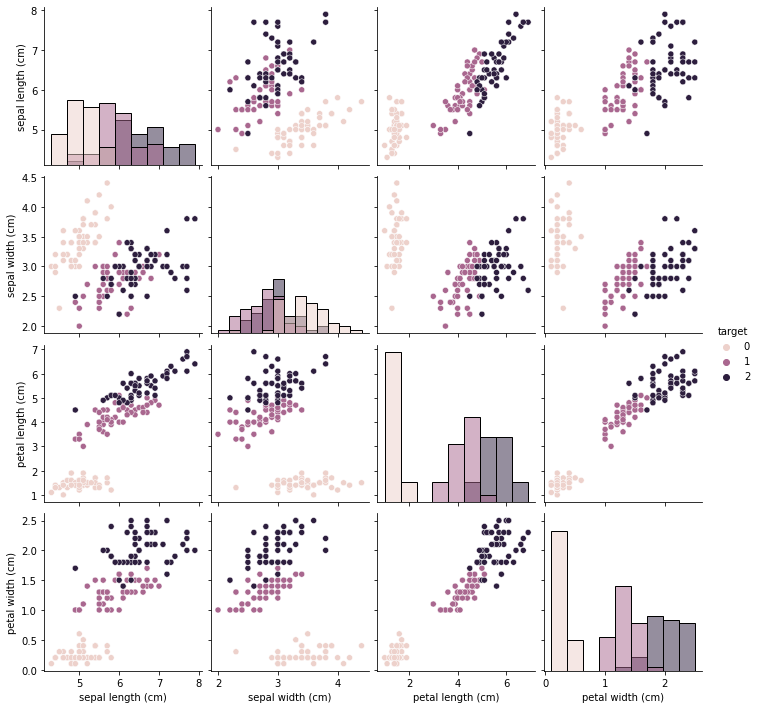

In [51]:
## 特征与标签组合的散点可视化,即是说这个用来展现变量两两之间的关系，线性、非线性、相关等等,diag_kind='hist'调色
sns.pairplot(data=iris_all,diag_kind='hist', hue= 'target')
plt.show()

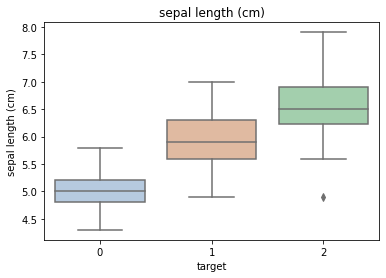

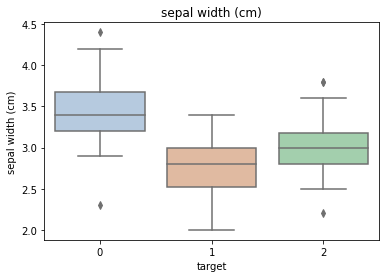

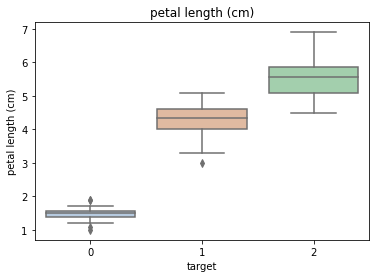

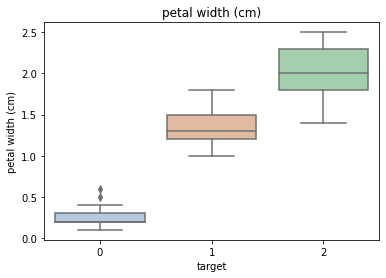

In [52]:
#箱型图
for col in iris_features.columns:
    sns.boxplot(x='target', y=col, saturation=0.5,palette='pastel', data=iris_all)
    plt.title(col)
    plt.show()

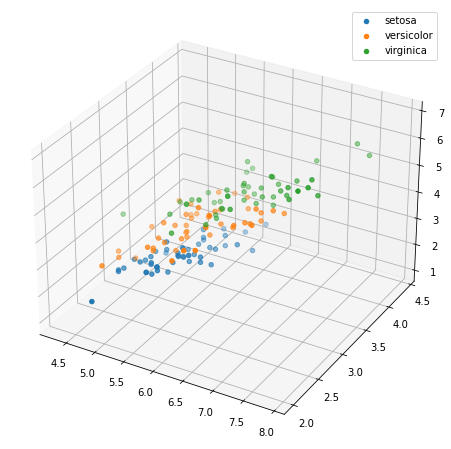

In [53]:
# 选取其前三个特征绘制三维散点图
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

iris_all_class0 = iris_all[iris_all['target']==0].values
iris_all_class1 = iris_all[iris_all['target']==1].values
iris_all_class2 = iris_all[iris_all['target']==2].values
# 'setosa'(0), 'versicolor'(1), 'virginica'(2)
ax.scatter(iris_all_class0[:,0], iris_all_class0[:,1], iris_all_class0[:,2],label='setosa')
ax.scatter(iris_all_class1[:,0], iris_all_class1[:,1], iris_all_class1[:,2],label='versicolor')
ax.scatter(iris_all_class2[:,0], iris_all_class2[:,1], iris_all_class2[:,2],label='virginica')
plt.legend()

plt.show()

Step5:利用 逻辑回归模型 在二分类上 进行训练和预测

In [58]:
## 选择其类别为0和1的样本 （不包括类别为2的样本）
iris_features_part = iris_features.iloc[:100]  #iloc 主要是通过行号获取行数据
iris_target_part = iris_target[:100]#前100行

## 测试集大小为20%， 80%/20%分
x_train, x_test, y_train, y_test = train_test_split(iris_features_part, iris_target_part, test_size = 0.2, random_state = 2020)    ##xy测试，xy实验
#train_test_split (*arrays，test_size, train_size, rondom_state=None, shuffle=True, stratify=None)
#arrays：特征数据和标签数据（array，list，dataframe等类型），要求所有数据长度相同。
#test_size / train_size: 测试集/训练集的大小，若输入小数表示比例，若输入整数表示数据个数。
#rondom_state：随机种子（一个整数），其实就是一个划分标记，对于同一个数据集，如果- rondom_state相同，则划分结果也相同。
#shuffle：是否打乱数据的顺序，再划分，默认True。
#stratify：none或者array/series类型的数据，表示按这列进行分层采样。

array([0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1])

In [55]:
## 定义 逻辑回归模型 
clf = LogisticRegression(random_state=0, solver='lbfgs')
##random_state：随机数种子，int类型，可选参数，默认为无，仅在正则化优化算法为sag,liblinear时有用。
##solver：优化算法选择参数，只有五个可选参数，即newton-cg,lbfgs,liblinear,sag,saga。默认为liblinear。solver参数决定了我们对逻辑回归损失函数的优化方法，有四种算法可以选择，分别是：
##liblinear：使用了开源的liblinear库实现，内部使用了坐标轴下降法来迭代优化损失函数。
##lbfgs：拟牛顿法的一种，利用损失函数二阶导数矩阵即海森矩阵来迭代优化损失函数。
##newton-cg：也是牛顿法家族的一种，利用损失函数二阶导数矩阵即海森矩阵来迭代优化损失函数。
#sag：即随机平均梯度下降，是梯度下降法的变种，和普通梯度下降法的区别是每次迭代仅仅用一部分的样本来计算梯度，适合于样本数据多的时候。
#saga：线性收敛的随机优化算法的的变重。###


In [59]:
# 在训练集上训练逻辑回归模型
## 用逻辑回归模型拟合构造的数据集           调用fit(x,y)的方法来训练模型，其中x为数据的属性，y为所属类型
clf.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [60]:
## 查看其对应的w
print('the weight of Logistic Regression:',clf.coef_)

## 查看其对应的w0
print('the intercept(w0) of Logistic Regression:',clf.intercept_)

the weight of Logistic Regression: [[ 0.45181973 -0.81743611  2.14470304  0.89838607]]
the intercept(w0) of Logistic Regression: [-6.53367714]


In [63]:
## 在训练集和测试集上分布利用训练好的模型进行预测
##也可以给新数据数据对其预测
train_predict = clf.predict(x_train)
test_predict = clf.predict(x_test)

array([0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1])

In [64]:
from sklearn import metrics

## 利用accuracy（准确度）【预测正确的样本数目占总预测样本数目的比例】评估模型效果
print('The accuracy of the Logistic Regression is:',metrics.accuracy_score(y_train,train_predict))
#accuracy_score准确率，顾名思义就是分类结果中正确分类的数据比总数目（不论是两个还是多类）；
print('The accuracy of the Logistic Regression is:',metrics.accuracy_score(y_test,test_predict))

The accuracy of the Logistic Regression is: 1.0
The accuracy of the Logistic Regression is: 1.0


In [65]:
## 查看混淆矩阵 (预测值和真实值的各类情况统计矩阵)
confusion_matrix_result = metrics.confusion_matrix(test_predict,y_test)
print('The confusion matrix result:\n',confusion_matrix_result)

The confusion matrix result:
 [[ 9  0]
 [ 0 11]]


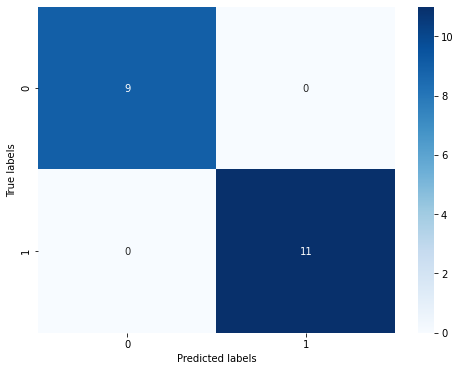

In [66]:
# 利用热力图对于结果进行可视化
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_result, annot=True, cmap='Blues')      #混淆矩阵可视化
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

Step6:利用 逻辑回归模型 在三分类(多分类)上 进行训练和预测

In [67]:
x_train, x_test, y_train, y_test = train_test_split(iris_features, iris_target, test_size = 0.2, random_state = 2020) 

In [68]:
clf = LogisticRegression(random_state=0, solver='lbfgs')
clf.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [70]:
## 查看其对应的w
print('the weight of Logistic Regression:',clf.coef_)

## 查看其对应的w0
print('the intercept(w0) of Logistic Regression:',clf.intercept_)

## 由于这个是3分类，所有我们这里得到了三个逻辑回归模型的参数，其三个逻辑回归组合起来即可实现三分类。

the weight of Logistic Regression: [[-0.45928925  0.83069892 -2.26606529 -0.99743983]
 [ 0.33117319 -0.72863426 -0.06841147 -0.98711029]
 [ 0.12811606 -0.10206466  2.33447676  1.98455011]]
the intercept(w0) of Logistic Regression: [  9.43880649   3.93047365 -13.36928015]


In [71]:
## 在训练集和测试集上分布利用训练好的模型进行预测
train_predict = clf.predict(x_train)
test_predict = clf.predict(x_test)

In [75]:
## 由于逻辑回归模型是概率预测模型（ p = p(y=1|x,\theta)）,所有我们可以利用 predict_proba 函数预测其概率
#返回的是一个 n 行 k 列的数组， 第 i 行 第 j 列上的数值是模型预测 第 i 个预测样本为某个标签的概率，并且每一行的概率和为1
train_predict_proba = clf.predict_proba(x_train)
test_predict_proba = clf.predict_proba(x_test)

In [76]:
print('The test predict Probability of each class:\n',test_predict_proba)
## 其中第一列代表预测为0类的概率，第二列代表预测为1类的概率，第三列代表预测为2类的概率。

## 利用accuracy（准确度）【预测正确的样本数目占总预测样本数目的比例】评估模型效果
print('The accuracy of the Logistic Regression is:',metrics.accuracy_score(y_train,train_predict))
print('The accuracy of the Logistic Regression is:',metrics.accuracy_score(y_test,test_predict))

The test predict Probability of each class:
 [[1.03461743e-05 2.33279482e-02 9.76661706e-01]
 [9.69926591e-01 3.00732871e-02 1.21677013e-07]
 [2.09992555e-02 8.69156613e-01 1.09844131e-01]
 [3.61934879e-03 7.91979964e-01 2.04400687e-01]
 [7.90943229e-03 8.00605296e-01 1.91485271e-01]
 [7.30034944e-04 6.60508053e-01 3.38761912e-01]
 [1.68614215e-04 1.86322047e-01 8.13509339e-01]
 [1.06915328e-01 8.90815535e-01 2.26913684e-03]
 [9.46928073e-01 5.30707271e-02 1.20016067e-06]
 [9.62346387e-01 3.76532214e-02 3.91897321e-07]
 [1.19533394e-04 1.38823471e-01 8.61056996e-01]
 [8.78881872e-03 6.97207354e-01 2.94003827e-01]
 [9.73938144e-01 2.60617331e-02 1.22613846e-07]
 [1.78434059e-03 4.79518175e-01 5.18697484e-01]
 [5.56924354e-04 2.46776840e-01 7.52666235e-01]
 [9.83549843e-01 1.64500657e-02 9.13617315e-08]
 [1.65201472e-02 9.54672748e-01 2.88071049e-02]
 [8.99853765e-03 7.82707573e-01 2.08293890e-01]
 [2.98015042e-05 5.45900078e-02 9.45380191e-01]
 [9.35695860e-01 6.43039548e-02 1.85301396e

The confusion matrix result:
 [[10  0  0]
 [ 0  8  2]
 [ 0  2  8]]


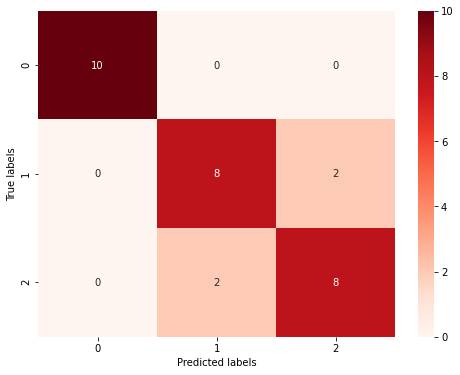

In [78]:
## 查看混淆矩阵
confusion_matrix_result = metrics.confusion_matrix(test_predict,y_test)
print('The confusion matrix result:\n',confusion_matrix_result)

# 利用热力图对于结果进行可视化
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_result, annot=True, cmap='Reds')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()